In [1]:
import pandas as pd
import os, glob
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib
import zipfile
from numpy import *

In [2]:
lzip = "/Users/yashwadgave/Documents/Images.zip"
zipref = zipfile.ZipFile(lzip,'r')
zipref.extractall("/Users/yashwadgave/Documents/")
zipref.close()

In [3]:
data = os.path.join("/Users/yashwadgave/Documents/Images/")
exp = os.listdir(data)
len(exp)

3

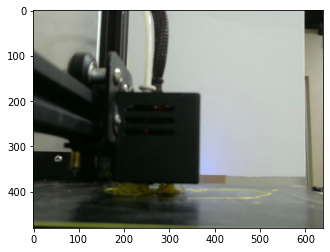

In [4]:
img = plt.imread("/Users/yashwadgave/Documents/Images/defected/bed_not_stick_14.jpg")
plt.imshow(img)

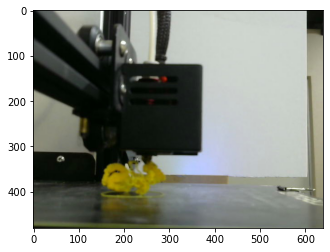

In [5]:
img = plt.imread("/Users/yashwadgave/Documents/Images/defected/leg_broken_19.jpg")
plt.imshow(img)

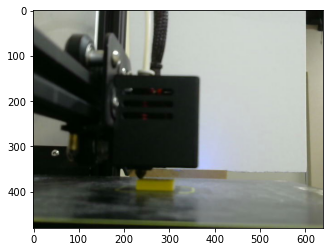

In [6]:
img = plt.imread("/Users/yashwadgave/Documents/Images/no_defected/scratch_1.jpg")
plt.imshow(img)

In [7]:
train = tf.keras.preprocessing.image_dataset_from_directory(data,batch_size=32,image_size=(224,224),shuffle=True)

test = tf.keras.preprocessing.image_dataset_from_directory(data,batch_size=32,image_size=(224,224),shuffle=True)

Found 1557 files belonging to 2 classes.
Found 1557 files belonging to 2 classes.


In [8]:
def getdata(tds,testds,ts=0.8,tests=0.2):
    ds_size = len(tds)
        
    train_size = int(ts*ds_size)
    test_size = int(tests*ds_size)
    
    train_set = tds.take(train_size)
    test_set = testds.skip(train_size).take(test_size)
    
    return train_set, test_set

In [9]:
train_set, test_set = getdata(train,test)

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_set = train_set.prefetch(buffer_size=AUTOTUNE)
test_set = test_set.prefetch(buffer_size=AUTOTUNE)

In [11]:
data_aug = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3)
])

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(224,224,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='softmax'),
    tf.keras.layers.Dense(2,activation='sigmoid')
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)            

In [14]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['acc'])

In [15]:
history = model.fit(train_set,validation_data=test_set,epochs=20)

Epoch 1/20
39/39 [==============================] - 21s 525ms/step - loss: 0.6934 - acc: 0.4928 - val_loss: 0.6926 - val_acc: 0.5278
Epoch 2/20
39/39 [==============================] - 21s 522ms/step - loss: 0.6930 - acc: 0.5184 - val_loss: 0.6932 - val_acc: 0.5035
Epoch 3/20
39/39 [==============================] - 20s 521ms/step - loss: 0.6927 - acc: 0.5160 - val_loss: 0.6936 - val_acc: 0.4965
Epoch 4/20
39/39 [==============================] - 21s 523ms/step - loss: 0.6927 - acc: 0.5160 - val_loss: 0.6948 - val_acc: 0.4757
Epoch 5/20
39/39 [==============================] - 20s 522ms/step - loss: 0.6930 - acc: 0.5120 - val_loss: 0.6922 - val_acc: 0.5243
Epoch 6/20
39/39 [==============================] - 20s 521ms/step - loss: 0.6929 - acc: 0.5128 - val_loss: 0.6962 - val_acc: 0.4549
Epoch 7/20
39/39 [==============================] - 21s 526ms/step - loss: 0.6927 - acc: 0.5176 - val_loss: 0.6936 - val_acc: 0.5000
Epoch 8/20
39/39 [==============================] - 23s 599ms/step - 